In [ ]:
import re

In [ ]:
import requests

# Синтаксис регулярных выражений

Простейший курс на закрепление материала: https://regexone.com/

Документация: https://docs.python.org/3/library/re.html#

## Спецсимволы

Синтаксис регулярных выражений используется главным образом в корпусной лингвистике и в ряде прикладных задач.

Точка соответствует одному любому символу.

In [ ]:
def print_result(x):
  if x:
    print('corresponds')
  else:
    print('does not correspond')

In [ ]:
line = 'кешбек'
pattern = r'к.шб.к'
k = re.search(pattern, line)
print_result(k)

In [ ]:
pattern = r'к.шб.к.'
k = re.search(pattern, line)
print_result(k)

t.ken

.ew

Если нам нужен паттерн, в котором присутствует точка, следует использовать экранирование (обратный слэш)

In [ ]:
line1 = 'кешбек.'
pattern = r'к.шб.к\.'
k = re.search(pattern, line1)
print_result(k)

Звёздочка обозначает любое количество повторений предыдущего символа.

In [ ]:
pattern = r'кешб.*'
k = re.search(pattern, line1)
print_result(k)

В том числе, что важно, и нулевое!

In [ ]:
pattern = r'кешбек.*'
k = re.search(pattern, line1)
print_result(k)

.*ew

В отличие от *, символ + означает, что символ встретится хотя бы 1 раз.

In [ ]:
pattern = r'кор.+'
k = re.search(pattern, 'кор')
print_result(k)

does not correspond


? - предыдущий символ повторяется 0 или 1 раз

In [ ]:
line = 'сбор'
pattern = r'с?б?ор'
k = re.search(pattern, line)
print_result(k)

In [ ]:
line = 'мор'
k = re.search(pattern, line)
print_result(k)

Мы можем задавать точное количество повторов в фигурных скобках.

Доллар означает конец строки.

In [ ]:
line = 'телеграмм'
pattern = r'телеграм{1,2}$'
k = re.search(pattern, line)
print_result(k)

Помимо символов, мы можем использовать группы [].

In [ ]:
line = 'кешбэк'
pattern = r'к[еэ]шб[еэ]к'
k = re.search(pattern, line)
print_result(k)

corresponds


t.d+[ey]

^ в группе означает "все символы, кроме"

In [ ]:
line = 'кэшбэк'
pattern = r'к[^е]шб[еэ]к'
k = re.search(pattern, line)
print_result(k)

corresponds


se[^e].+

Попробуем отфильтровать все трёхбуквенные слова.

In [ ]:
sequence = ['123', 'wa4', 'h5u1', 'set', 'lark', 'met', '2get']
pattern = '^[a-z]{3}$'
for s in sequence:
  k = re.search(pattern, s)
  if k:
    print(s)

Существует также специальный символ для ВСЕХ цифр и букв - \w
Если нужно, чтобы символ как раз НЕ был цифрой или буквой, используем \W

In [ ]:
pattern = '^\w{3}$'
for s in sequence:
  k = re.search(pattern, s)
  if k:
    print(s)

In [ ]:
line = 'What?'
pattern = r'.*\W{1,}'
k = re.search(pattern, line)
print_result(k)

В квадратных скобках мы также можем задавать определенный диапазон значений. Попробуем найти в перечне даты, относящиеся к XVIII-XX вв.

In [ ]:
years = ['1725', '1814', '1916', '1729', '1643', 'abcd', '25648', 'a1614']
pattern = r'^\d[7-9]\d{2}$'
for year in years:
  k = re.search(pattern, year)
  if k:
    print(year)

Пробел обозначается символом \s

In [ ]:
line = 'get out'
pattern = '\w+\s[\w]+'
k = re.search(pattern, line)
print_result(k)

## Класс re.Match

In [ ]:
line = 'кешбек'
pattern = r'к.шб.к'
k = re.search(pattern, line)
type(k)

re.Match

Посмотрим, что мы можем вытащить из объекта этого класса.

С помощью метода group мы можем вытащить ту часть изначальной строки, которая соответствует нашему запросу.

In [ ]:
k.group()

In [ ]:
churchill = 'Sir Winston Leonard Spencer Churchill[a] (30 November 1874 – 24 January 1965) was a British statesman, military officer, and writer.'

In [ ]:
f = re.search(r'\d{4}', churchill)
f.group()

В скобки мы можем поместить так называемые "группы" - то, что мы хотим вытащить из заданной строки. Это позволяет быстро проводить поиск и сразу обрабатывать данные.

In [ ]:
f1 = re.search(r'(\d{4}).+(\d{4})', churchill)

In [ ]:
f1.groups()

In [ ]:
f1.group(0)

In [ ]:
f1.group(1)

In [ ]:
f1.group(2)

Вот тут у нас включается так называемый "жадный" поиск.

In [ ]:
churchill1 = 'Sir Winston Leonard Spencer Churchill[a] (30 November 1874 – 24 January 1965) was a British statesman, military officer, and writer who was Prime Minister of the United Kingdom from 1940 to 1945 (during the Second World War) and again from 1951 to 1955. For some 62 of the years between 1900 and 1964, he was a member of parliament (MP) and represented a total of five constituencies over that time. Ideologically an adherent to economic liberalism and imperialism, he was for most of his career a member of the Conservative Party, which he led from 1940 to 1955. He was a member of the Liberal Party from 1904 to 1924.'

In [ ]:
f2 = re.search(r'(\d{4}).+(\d{4})', churchill1)
f2.groups()

Чтобы этого избежать, используем ?

In [ ]:
f3 = re.search(r'(\d{4}).+?(\d{4})', churchill1)
f3.groups()

## Полезные функции

### re.match

Чтобы проверить строку на соответствие паттерну, мы можем также использовать функцию match. В отличие от search, она даёт значение True только в том случае, если строка соответствует паттерну с первого же символа.

In [ ]:
line = 'кешбек'
pattern = r'к.шб.к'
k = re.match(pattern, line)
print_result(k)

In [ ]:
line = 'окешбек'
pattern = r'к.шб.к'
k = re.match(pattern, line)
print_result(k)

In [ ]:
line = 'окешбек'
pattern = r'к.шб.к'
k = re.search(pattern, line)
print_result(k)

In [ ]:
k.group()

### re.split

Чтобы разбить строку на несколько, используется функция split, которая ведёт себя несколько иначе, чем в базовом синтаксисе Python.

In [ ]:
re.split(r'\W+', churchill)

In [ ]:
re.split(r'(\W+)', churchill)

In [ ]:
re.split(r'\s', churchill)

In [ ]:
re.split(r'\D', '2a36B44')

In [ ]:
re.split(r'(\D)', '2a36B44')

### re.findall

Возвращает список со всеми обнаруженными соответствиями, если они не пересекаются.

In [ ]:
dost = "В конце ноября, в оттепель, часов в девять утра, поезд Петербургско-Варшавской железной дороги на всех парах подходил к Петербургу. Было так сыро и туманно, что насилу рассвело; в десяти шагах, вправо и влево от дороги, трудно было разглядеть хоть что-нибудь из окон вагона. Из пассажиров были и возвращавшиеся из-за границы; но более были наполнены отделения для третьего класса, и всё людом мелким и деловым, не из очень далека. Все, как водится, устали, у всех отяжелели за ночь глаза, все назяблись, все лица были бледно-желтые, под цвет тумана. В одном из вагонов третьего класса, с рассвета, очутились друг против друга, у самого окна, два пассажира — оба люди молодые, оба почти налегке, оба не щегольски одетые, оба с довольно замечательными физиономиями и оба пожелавшие, наконец, войти друг с другом в разговор. Если б они оба знали один про другого, чем они особенно в эту минуту замечательны, то, конечно, подивились бы, что случай так странно посадил их друг против друга в третьеклассном вагоне петербургско-варшавского поезда. Один из них был небольшого роста, лет двадцати семи, курчавый и почти черноволосый, с серыми маленькими, но огненными глазами. Нос его был широк и сплюснут, лицо скулистое; тонкие губы беспрерывно складывались в какую-то наглую, насмешливую и даже злую улыбку; но лоб его был высок и хорошо сформирован и скрашивал неблагородно развитую нижнюю часть лица. Особенно приметна была в этом лице его мертвая бледность, придававшая всей физиономии молодого человека изможденный вид, несмотря на довольно крепкое сложение, и вместе с тем что-то страстное, до страдания, не гармонировавшее с нахальною и грубою улыбкой и с резким, самодовольным его взглядом. Он был тепло одет, в широкий мерлушечий черный крытый тулуп, и за ночь не зяб, тогда как сосед его принужден был вынести на своей издрогшей спине всю сладость сырой ноябрьской русской ночи, к которой, очевидно, был не приготовлен. На нем был довольно широкий и толстый плащ без рукавов и с огромным капюшоном, точь-в-точь как употребляют часто дорожные, по зимам, где-нибудь далеко за границей, в Швейцарии или, например, в Северной Италии, не рассчитывая, конечно, при этом и на такие концы по дороге, как от Эйдткунена до Петербурга. Но что годилось и вполне удовлетворяло в Италии, то оказалось не совсем пригодным в России. Обладатель плаща с капюшоном был молодой человек, тоже лет двадцати шести или двадцати семи, роста немного повыше среднего, очень белокур, густоволос, со впалыми щеками и с легонькою, востренькою, почти совершенно белою бородкой. Глаза его были большие, голубые и пристальные; во взгляде их было что-то тихое, но тяжелое, что-то полное того странного выражения, по которому некоторые угадывают с первого взгляда в субъекте падучую болезнь. Лицо молодого человека было, впрочем, приятное, тонкое и сухое, но бесцветное, а теперь даже досиня иззябшее. В руках его болтался тощий узелок из старого, полинялого фуляра, заключавший, кажется, всё его дорожное достояние. На ногах его были толстоподошвенные башмаки с штиблетами, — всё не по-русски."

In [ ]:
re.findall(r'\b[а-я]*ш[а-я]*', dost, flags=re.IGNORECASE)

### re.sub

Возвращает строку, в которой заданный паттерн меняется на заданную

последовательность символов

In [ ]:
ch = re.sub(r'\d{4}', '__', churchill)
ch

'Sir Winston Leonard Spencer Churchill[a] (30 November __ – 24 January __) was a British statesman, military officer, and writer.'

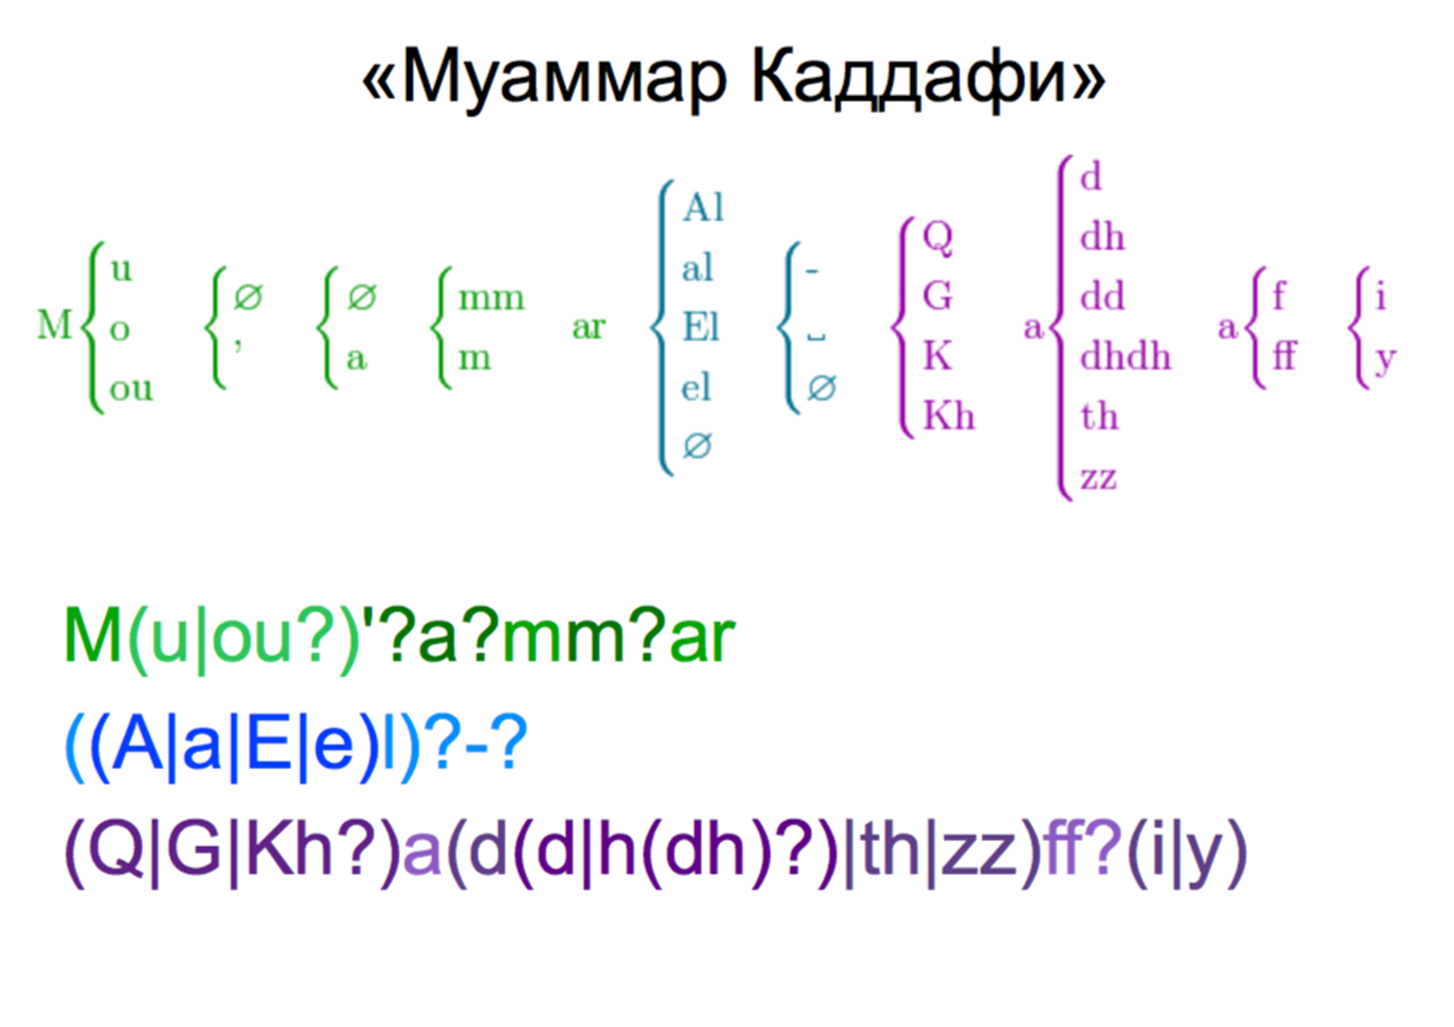

# Базовые инструменты библиотеки transformers

https://huggingface.co/

## Токенизаторы

In [ ]:
import transformers

В данную библиотеку загружено множество языковых моделей, которые можно загружать в свою программу, использовать и дообучать.

In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
churchill1

'Sir Winston Leonard Spencer Churchill[a] (30 November 1874 – 24 January 1965) was a British statesman, military officer, and writer who was Prime Minister of the United Kingdom from 1940 to 1945 (during the Second World War) and again from 1951 to 1955. For some 62 of the years between 1900 and 1964, he was a member of parliament (MP) and represented a total of five constituencies over that time. Ideologically an adherent to economic liberalism and imperialism, he was for most of his career a member of the Conservative Party, which he led from 1940 to 1955. He was a member of the Liberal Party from 1904 to 1924.'

In [ ]:
tokens = tokenizer.tokenize(churchill1)

In [ ]:
tokenizer(churchill)

{'input_ids': [101, 2909, 10180, 7723, 7084, 10888, 1031, 1037, 1033, 1006, 2382, 2281, 7586, 1516, 2484, 2254, 3551, 1007, 2001, 1037, 2329, 17689, 1010, 2510, 2961, 1010, 1998, 3213, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

## Pipeline

In [ ]:
from transformers import pipeline

Анализ тональности

In [ ]:
clf = pipeline("sentiment-analysis", model='ProsusAI/finbert')

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
clf(['I detest it, it all went completely wrong!', 'I mostly enjoyed this trip, though'])

[{'label': 'negative', 'score': 0.8441548347473145},
 {'label': 'neutral', 'score': 0.8213256597518921}]

Суммаризация

In [ ]:
tolstoy = """Biographical historians and historians of separate nations understand this force as a power inherent in heroes and rulers. In their narration events occur solely by the will of a Napoleon, and Alexander, or in general of the persons they describe. The answers given by this kind of historian to the question of what force causes events to happen are satisfactory only as long as there is but one historian to each event. As soon as historians of different nationalities and tendencies begin to describe the same event, the replies they give immediately lose all meaning, for this force is understood by them all not only differently but often in quite contradictory ways. One historian says that an event was produced by Napoleon’s power, another that it was produced by Alexander’s, a third that it was due to the power of some other person. Besides this, historians of that kind contradict each other even in their statement as to the force on which the authority of some particular person was based. Thiers, a Bonapartist, says that Napoleon’s power was based on his virtue and genius. Lanfrey, a Republican, says it was based on his trickery and deception of the people. So the historians of this class, by mutually destroying one another’s positions, destroy the understanding of the force which produces events, and furnish no reply to history’s essential question."""

In [ ]:
summarizer = pipeline("summarization", model='facebook/bart-large-cnn')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
summarizer([tolstoy])

[{'summary_text': 'Biographical historians and historians of separate nations understand this force as a power inherent in heroes and rulers. In their narration events occur solely by the will of a Napoleon, and Alexander, or in general of the persons they describe. The answers given by this kind of historian to the question of what force causes events to happen are satisfactory only as long as there is but one historian to each event.'}]

Перевод

In [ ]:
translator = pipeline('translation', model='facebook/nllb-200-distilled-600M')

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sent = "J'ai un fils adolescent, un mari toujours absent"

In [ ]:
sent2 = 'Мчатся тучи, вьются тучи'

In [ ]:
translator(sent, src_lang='French', tgt_lang='English')

[{'translation_text': 'I have a teenage son, a husband always absent'}]

In [ ]:
translator(sent2, src_lang='Russian', tgt_lang='English')

[{'translation_text': 'Clouds are rolling, clouds are rolling.'}]

# Практикум

1. С веб-страницы https://misis.ru/applicants/admission/magistracy/faculties/lingmg/digling/ вытащите все ссылки, ведущие на страницы на сайте misis.ru. Вывести все эти ссылки на экран в виде полных веб-адресов (https:// ... .ru) в алфавитном порядке.

Подсказка: просмотреть код страницы, находясь на самой странице, можно с помощью комбинации клавиш "Ctrl + U". Для того чтобы загрузить html-код в виде строки в программу, воспользуйтесь библиотекой requests

In [ ]:
sites = requests.get('https://misis.ru/applicants/admission/magistracy/faculties/lingmg/digling/').text

In [1]:
import re
import requests

url = "https://misis.ru/applicants/admission/magistracy/faculties/lingmg/digling/"
html = requests.get(url).text

pattern = r"https://misis\.ru[^\"']+"

links = re.findall(pattern, html)

links = sorted(set(links))

for link in links:
    print(link)

https://misis.ru/applicants/admission/magistracy/faculties/lingmg/digling/
https://misis.ru/f/src/images/misis-logo-ru-1.png


2. Загрузите с веб-страницы https://www.gutenberg.org/files/4300/4300-h/4300-h.htm#chap01 текст 1-й главы романа "Улисс". Подсчитайте частоту всех использованных слов с помощью класса Counter из библиотеки Collections. Напишите функцию, которая выводит на экран и записывает в файл txt все случаи употребления заданного слова в заданной длине контекста. Функция должна принимать на вход 4 аргумента: 1) текст документа; 2) слово, случаи употребления которого нужно найти; 3) длина левого контекста; 4) длина правого контекста. Также задайте в данной функции параметр cut_length, значение которого по умолчанию False. Если задать значение True, то функция должна выводить на экран и записывать в файл фрагменты правого и левого контекста ТОЛЬКО в рамках одного предложения (допустим, если длина правого контекста равна пяти, а искомое слово идёт в данном предложении последним, выводить все последующие 5 слов из другого предложения не нужно).

In [2]:
import requests
import re
from collections import Counter

url = "https://www.gutenberg.org/files/4300/4300-h/4300-h.htm#chap01"
html = requests.get(url).text

text = re.sub(r"<.*?>", " ", html)
text = re.sub(r"\s+", " ", text)

words = re.findall(r"[A-Za-z']+", text.lower())

freq = Counter(words)

print("Самые частые слова:")
print(freq.most_common(20))


Самые частые слова:
[('the', 14957), ('of', 8144), ('and', 7217), ('a', 6526), ('to', 4960), ('in', 4948), ('he', 4224), ('his', 3330), ('i', 2997), ('s', 2832), ('that', 2780), ('with', 2515), ('it', 2515), ('mdash', 2405), ('was', 2133), ('on', 2117), ('you', 2013), ('for', 1939), ('her', 1785), ('him', 1525)]


In [3]:
def find_context(text, word, left, right, cut_length=False):
    words = text.split()
    results = []

    for i, w in enumerate(words):
        if w.lower() == word.lower():

            left_slice = words[max(0, i-left): i]
            right_slice = words[i+1 : i+1+right]

            if cut_length:
                sentence = re.search(r'[^.!?]*'+word+r'[^.!?]*', text, flags=re.IGNORECASE)
                if sentence:
                    sent_words = sentence.group().split()
                    if word.lower() in [w.lower() for w in sent_words]:
                        idx = [j for j, w in enumerate(sent_words) if w.lower()==word.lower()][0]
                        left_slice = sent_words[max(0, idx-left): idx]
                        right_slice = sent_words[idx+1: idx+1+right]

            results.append((" ".join(left_slice), word, " ".join(right_slice)))

    return results


In [4]:
out = find_context(text, "man", 3, 3, cut_length=True)

for left, w, right in out[:10]:
    print(left, "[", w, "]", right)
    print()


dark with a [ man ] I donât know

expects that every [ man ] this day will

days today. The [ man ] that was drowned.

shoulder. A young [ man ] clinging to a

boots. An elderly [ man ] shot up near

town, the young [ man ] said, grasping again

bed. The young [ man ] shoved himself backward

bulk of a [ man ] in tartan fillibegs:

By them, the [ man ] with my voice

bang shotgun, bits [ man ] spattered walls all



3. Сравните скорость и качество работы re.split и токенизаторов из библиотек transformers и nltk. Для этого разбейте текст 1-й главы Улисса (предварительно очищенной от тэгов!) на слова с помощью функции re.split и на токены с помощью любого токенизатора. С помощью библиотеки time зафиксируйте время, которое ушло в каждом случае на обработку текста. Подсчитайте количество различных токенов, получившихся в результате обработки текста различными методами. Чем отличаются полученные наборы токенов?

In [6]:
import re
import time
import nltk
from transformers import BertTokenizer

nltk.download('punkt')
nltk.download('punkt_tab')

clean = re.sub(r"<.*?>", " ", text)
clean = re.sub(r"\s+", " ", clean)

start = time.time()
tokens_re = re.split(r"\W+", clean)
t1 = time.time() - start

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
start = time.time()
tokens_bert = tokenizer.tokenize(clean)
t2 = time.time() - start

start = time.time()
tokens_nltk = nltk.word_tokenize(clean)
t3 = time.time() - start

print("re.split количество:", len(tokens_re), "время:", t1)
print("BERT количество:", len(tokens_bert), "время:", t2)
print("NLTK количество:", len(tokens_nltk), "время:", t3)

print("\nПример NLTK токенов:", tokens_nltk[:20])
print("Пример BERT токенов:", tokens_bert[:20])
print("Пример re.split токенов:", tokens_re[:20])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


re.split количество: 272814 время: 0.28233933448791504
BERT количество: 376458 время: 10.705934286117554
NLTK количество: 320071 время: 3.7259633541107178

Пример NLTK токенов: ['Ulysses', '|', 'Project', 'Gutenberg', 'body', '{', 'margin-left', ':', '10', '%', ';', 'margin-right', ':', '10', '%', ';', 'text-align', ':', 'justify', '}']
Пример BERT токенов: ['ulysses', '|', 'project', 'gut', '##enberg', 'body', '{', 'margin', '-', 'left', ':', '10', '%', ';', 'margin', '-', 'right', ':', '10', '%']
Пример re.split токенов: ['', 'Ulysses', 'Project', 'Gutenberg', 'body', 'margin', 'left', '10', 'margin', 'right', '10', 'text', 'align', 'justify', 'h1', 'h2', 'h3', 'h4', 'text', 'align']


Метод re.split работает быстрее всех, так как он не анализирует текст, а просто режет по регулярному выражению. Из-за этого он дает очень простой набор токенов и часто создаёт лишние пустые токены.
Токенизатор BERT работает медленнее, потому что использует сложные правила и разбивает слова на субтокены (например, 'playing' → ['play', '##ing']). Такой способ лучше подходит для моделей машинного обучения.
Токенизатор NLTK занимает промежуточное место: он медленнее, чем re.split, но быстрее, чем BERT, и при этом учитывает пунктуацию и базовые правила языка.